# 1. Perkenalan

- Nama: Bintang Muhammad
- Batch: 6
- Class: Data Science

- Dataset is a Twicth Game Dataset from a period of time with its details
- Objective: create a Cluster for the marketing department to see which game we should look to to add sponsor.

# 2. Import Libarry

In [491]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn2pmml import PMMLPipeline
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import pickle

# 3. Data Loading

In [492]:
#data loading
df=pd.read_csv('Twitch_game_dataa.csv',encoding = 'ISO-8859-1')

In [493]:
#view data
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


- Data consists of Games played(Hours, viewers) on Twitch from 2016 to 2021 every month

# 4. Data Cleaning

In [494]:
#view general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              14200 non-null  int64  
 1   Game              14199 non-null  object 
 2   Month             14200 non-null  int64  
 3   Year              14200 non-null  int64  
 4   Hours_watched     14200 non-null  int64  
 5   Hours_Streamed    14200 non-null  object 
 6   Peak_viewers      14200 non-null  int64  
 7   Peak_channels     14200 non-null  int64  
 8   Streamers         14200 non-null  int64  
 9   Avg_viewers       14200 non-null  int64  
 10  Avg_channels      14200 non-null  int64  
 11  Avg_viewer_ratio  14200 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.3+ MB


- There are 14200 row and 12 columns in this data
- There is 1 float data, 9 integer data, and 2 object data

In [495]:
#view null columns
df.isna().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [496]:
#drop null columns
df=df.dropna()

In [497]:
#drop duplicate daya
df.duplicated().sum()

0

In [498]:
#drop last 6 string from the columns
df['Hours_Streamed']=df['Hours_Streamed'].str[:-6]

In [499]:
#filter data by year more than 2020
df20=df[df['Year']>=2020]

- Data was choosen more than 2020 because the conditions from 2019 to above 2020 is very different due to corona

In [500]:
#change data type
df20=df20.astype({'Hours_Streamed':'int64'})

In [501]:
#group by data by game names
df20=df20.groupby('Game').sum().reset_index()

In [502]:
#avg viewer ratio needs a new calculation because the calculation is innacurate after grouping
df20['Avg_viewer_ratio']=df20['Avg_viewers']/df20['Avg_channels']

In [503]:
#filter this columns because it will gace infinite numbers
df20=df20[df20['Avg_channels']>0]

In [504]:
#drop unused columns
df20=df20.drop(columns=['Month','Year','Rank','Peak_viewers','Peak_channels'])

- Year and Month was dropped because it is a categorical data
- Rank, Peak Viewers, Peak Channels was dropped because it is irrelevant 

# 5. Data Exploration

| Variable | Definition |
| ----------- | ----------- |
| Game| Game Name| 
| Hours Watched | Hours watched on twitch |
| Hours Streamed | Hours streamed on twitch | 
| Streamers | Amount of streamers who streamed the game | 
| Avg_viewers | Average Viewers |
| Avg_channels | Average amount of channels |
|Avg_viewer_ratio | Average amount of viewer per channel |

In [505]:
#view general info
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 733
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              726 non-null    object 
 1   Hours_watched     726 non-null    int64  
 2   Hours_Streamed    726 non-null    int64  
 3   Streamers         726 non-null    int64  
 4   Avg_viewers       726 non-null    int64  
 5   Avg_channels      726 non-null    int64  
 6   Avg_viewer_ratio  726 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 45.4+ KB


- Data consists of 7 columns and 726 row after cleaning
- There are 1 float data, 5 integer data, and 1 object data
- There is no null values

In [506]:
df20.describe()

,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.000000,726.000000
mean,5.154310e+07,1.767101e+06,1.700454e+05,7.067117e+04,2419.836088,104.323707
std,2.787902e+08,8.777238e+06,8.080907e+05,3.823166e+05,12031.439708,269.235200
min,3.417670e+05,7.430000e+02,4.300000e+01,4.610000e+02,1.000000,2.428489
25%,1.072234e+06,1.857125e+04,2.641000e+03,1.469750e+03,24.250000,24.195177
50%,3.131412e+06,7.742800e+04,1.084300e+04,4.261500e+03,104.000000,42.717949
75%,1.698402e+07,5.134620e+05,6.300775e+04,2.328375e+04,698.500000,76.848931
max,4.745124e+09,1.406923e+08,1.281703e+07,6.506589e+06,192806.000000,3214.000000


- All of the data have a mean values  above the median, indicating it is positively skewed
- All of the data have a large distance between Q3 and Max value, indicating there is an outliers.

In [507]:
#create numerical data names
nums=df20.select_dtypes(include=['int64','float64']).columns

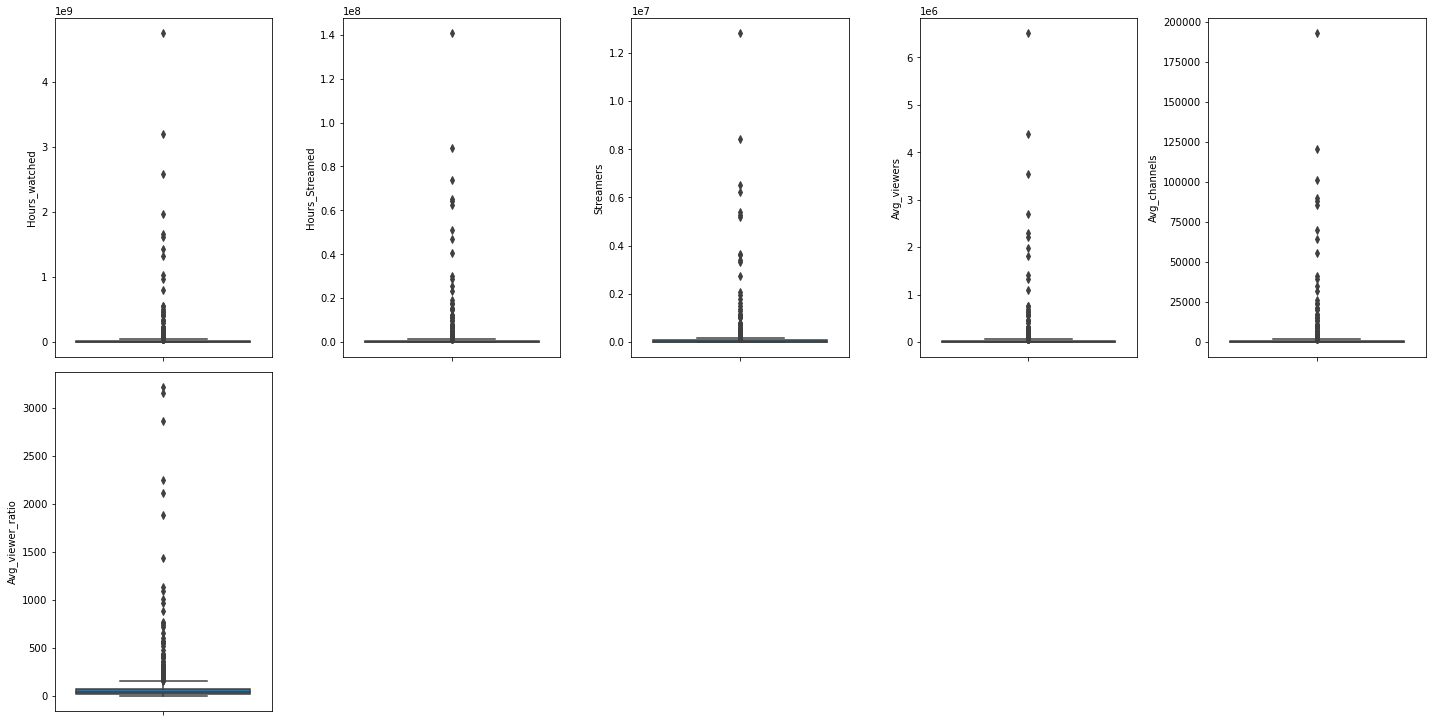

In [508]:
#visualize data with box plot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.boxplot(y=df20[nums[i]], orient='v')
    plt.tight_layout()

- All of the data have outliers

In [509]:
#took numericaldata type
nums2=df20.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Hours_watched outliers = 12.67%
Column Hours_Streamed outliers = 15.43%
Column Streamers outliers = 14.60%
Column Avg_viewers outliers = 12.67%
Column Avg_channels outliers = 15.43%
Column Avg_viewer_ratio outliers = 12.12%


- Most of the data have below 15% outliers.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

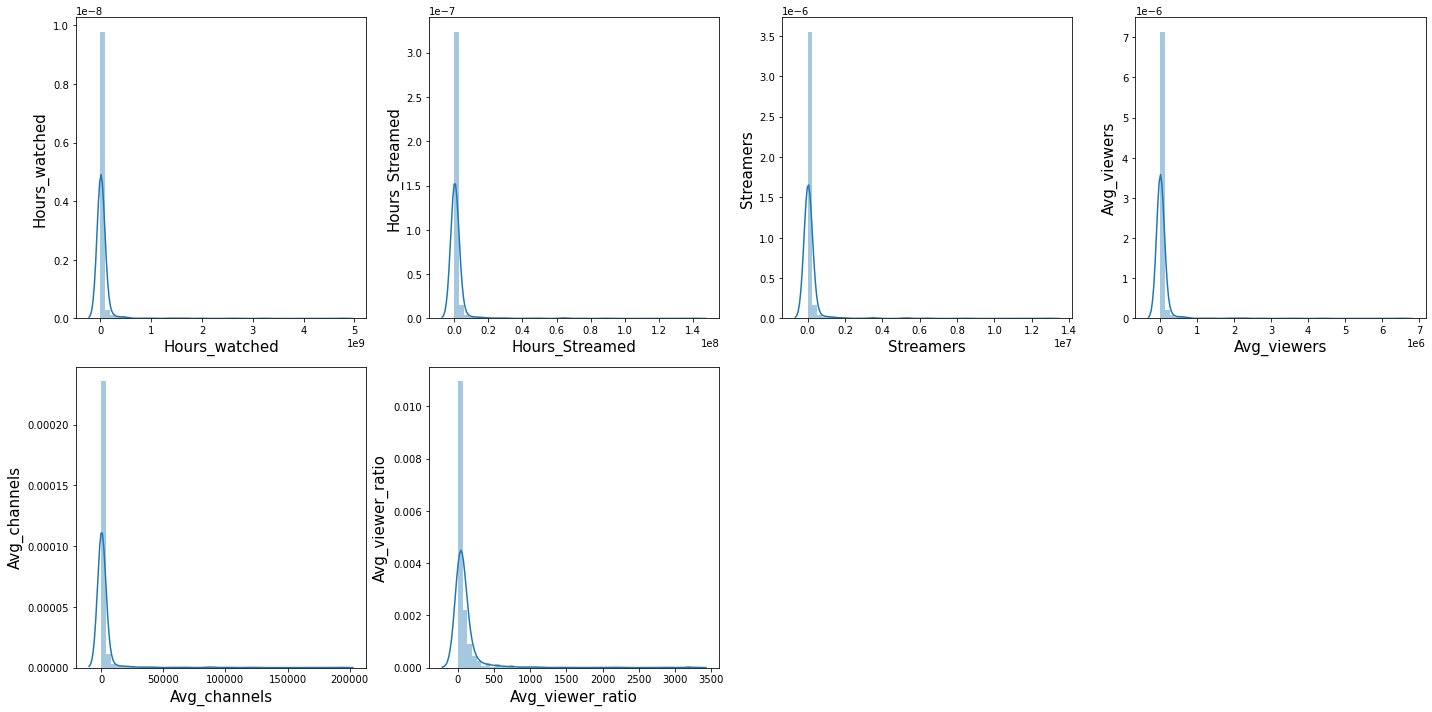

In [510]:
#visualize data with dist plot
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.distplot(df20[nums[i]])
    plt.tight_layout()
    plt.xlabel(nums[i],fontsize=15)
    plt.ylabel(nums[i],fontsize=15)

- All of the data are positively skewed

In [511]:
#group by number of employess
dfnre=df20.groupby(pd.cut(df20["Hours_watched"], np.arange(300000, 5000000, 500000))).count()[['Game']]
dfnre=dfnre.rename(columns={'Game':'count'}).reset_index()
dfnre.head()

,Hours_watched,count
0,"(300000, 800000]",120
1,"(800000, 1300000]",100
2,"(1300000, 1800000]",50
3,"(1800000, 2300000]",40
4,"(2300000, 2800000]",39


- Most of the game watched is around 300k - 800k hours and 800k - 1.300k hours

In [512]:
#group by number of employess
dfnren=df20.groupby(pd.cut(df20["Hours_Streamed"], np.arange(300000, 5000000, 500000))).count()[['Game']]
dfnren=dfnren.rename(columns={'Game':'count'}).reset_index()
dfnren.head()

,Hours_Streamed,count
0,"(300000, 800000]",85
1,"(800000, 1300000]",39
2,"(1300000, 1800000]",21
3,"(1800000, 2300000]",16
4,"(2300000, 2800000]",10


- Most of the game streamed is around 300k - 800k hours

In [513]:
#group by number of employess
dfnrens=df20.groupby(pd.cut(df20["Streamers"], np.arange(40, 5000000, 2500))).count()[['Game']]
dfnrens=dfnrens.rename(columns={'Game':'count'}).reset_index()
dfnrens.head()

,Streamers,count
0,"(40, 2540]",175
1,"(2540, 5040]",96
2,"(5040, 7540]",54
3,"(7540, 10040]",32
4,"(10040, 12540]",25


- Most of the game streamed  have around 40 - 2540 streamers and 2540 - 5040 streamers

In [514]:
#group by number of employess
dfavg=df20.groupby(pd.cut(df20["Avg_viewer_ratio"], np.arange(10, 200, 20))).count()[['Game']]
dfavg=dfavg.rename(columns={'Game':'count'}).reset_index()
dfavg.head()

,Avg_viewer_ratio,count
0,"(10, 30]",241
1,"(30, 50]",159
2,"(50, 70]",103
3,"(70, 90]",46
4,"(90, 110]",23


- Most of the game streamed  have around 10 - 30, 30 - 50, and 50 - 70 average viewer ratio

## Data Exploration Summary

- All of the data used are numerical
- All of the data have mean > median, and a large range between Q3 and max value
- All of the data have outliers and positively skewed
- Most of the game streamed is around 300k - 800k hours
- Most of the game watched is around 300k - 1.300k hours

# 6. Data Preprocessing

## Create Data With no Outliers for K Means and Agglomerative

In [515]:
# Remove outlier outside 1,5 IQR for train data (x)

cols=df20.select_dtypes(include=['int64','float64']).columns
print(f'Jumlah baris sebelum memfilter outlier: {len(df20)}')

filtered_entries = np.array([True] * len(df20))
for col in range(len(cols)):
    Q1 = df20[cols[col]].quantile(0.25)
    Q3 = df20[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df20[cols[col]] >= low_limit) & (df20[cols[col]] <= high_limit)) & filtered_entries
    
dfo = df20[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 726
Jumlah baris setelah memfilter outlier: 505


In [516]:
#split data
xvalid, xreal = np.split(dfo, [int(.05*len(dfo))])

In [517]:
#dropping game because it is a categorical data
xreal2=xreal.drop(columns=['Game'])

In [518]:
#define nums cats pipeline
minmax = Pipeline([('std_scaler', MinMaxScaler())])
#fit pipeline to train and test data features
xreals=minmax.fit_transform(xreal2)

In [519]:
#define pca and fit
pca = PCA()
pca.fit(xreals)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

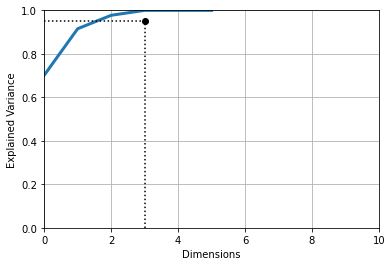

In [520]:
#plot pca graph
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

- I will choose 3 for the pca components

In [521]:
#fit transform pca
pcakagg = PCA(n_components=3)
xreduced = pcakagg.fit_transform(xreals)

In [522]:
#check explained ratio
np.sum(pcakagg.explained_variance_ratio_)

0.977322958337629

## Create Data With Outliers for DB Scan

In [523]:
#split data
xvaliddb, xrealdb = np.split(df20, [int(.05*len(dfo))])

In [524]:
#dropping cats data
xreal2db=xrealdb.drop(columns=['Game'])

In [525]:
#define nums cats pipeline
minmax = Pipeline([('std_scaler', MinMaxScaler())])
#fit pipeline to train and test data features
xrealsdb=minmax.fit_transform(xreal2db)

In [526]:
#define pca and fit
pca = PCA()
pca.fit(xrealsdb)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

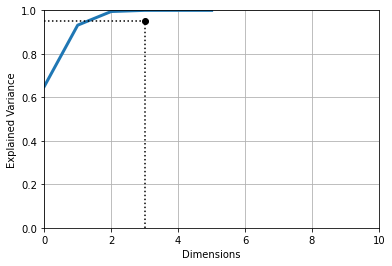

In [527]:
#plot pca graph
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

- I will choose 3 for the PCA components

In [528]:
#fit transform pca
pca = PCA(n_components=3)
xreduceddb = pca.fit_transform(xrealsdb)

In [529]:
#check explained ratio
np.sum(pca.explained_variance_ratio_)

0.9947045534067993

# 7. Define Model

In [530]:
#define model
kmeans=KMeans(n_clusters=5,random_state=91)
dbscan=DBSCAN()
agg=AgglomerativeClustering(n_clusters=5)

# 8. Train Model

In [531]:
#fitting training data to model Random Forest
kmeans.fit(xreduced)
dbscan.fit(xreduced)
agg.fit(xreduced)

AgglomerativeClustering(n_clusters=5)

# 9. Model Evaluation

## K Means Clustering

In [532]:
#finding best K
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmeans=KMeans(i)
    kmeans.fit(xreduced)
    cost.append(kmeans.inertia_)  

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


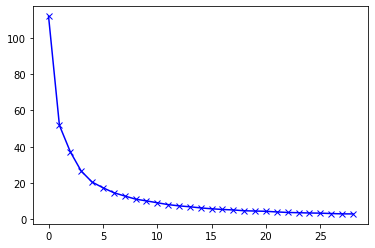

In [533]:
#view best K
plt.plot(cost,'bx-')

- 3 to 5 seems the best elbow cluster for K means

In [534]:
#fit to multiple k
kmeans_per_k = [KMeans(n_clusters=k, random_state=91).fit(xreduced) for k in range(1, 10)]

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [535]:
#silhouette score
silhouette_scores = [silhouette_score(xreduced, model.labels_)
                     for model in kmeans_per_k[1:]]

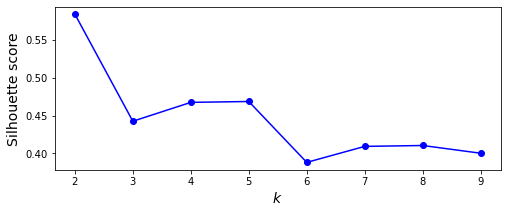

In [536]:
#silhouette scores plot
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- 2, 3 and 5 seems the best k for k means

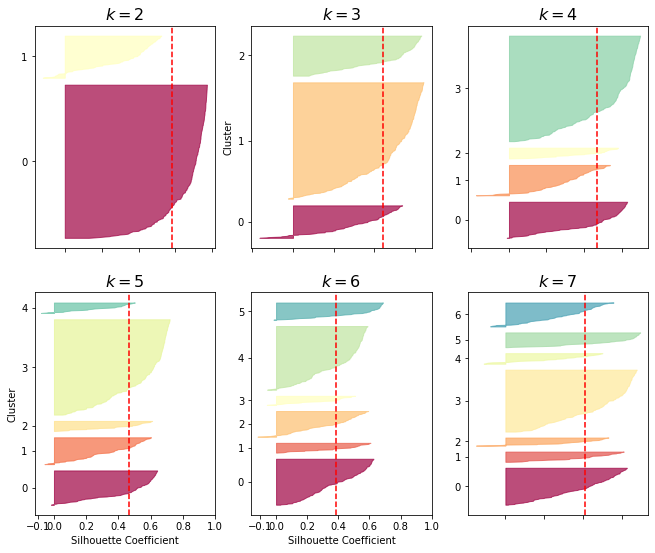

In [537]:
#view silhouette graph
plt.figure(figsize=(11, 9))

for k in (2,3,4,5,6,7):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(xreduced, y_pred)

    padding = len(xreduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- I will choose 3 for the clusters value

In [538]:
#fit and predict based on new clusters
kmeans2=KMeans(n_clusters=3, random_state=91)
kmeans2.fit_predict(xreduced)

#append labels to original dataframe with CATEGORICAL data
labels=kmeans2.labels_
clusterskm=xreal2.copy()
clusterskm['cluster']=labels

In [539]:
#append labels to data to view silhouete score
clusterskmr=xreal.copy()
clusterskmr['cluster']=labels
#clusterskmr=clusterskmr.drop(columns=['Month'])

In [540]:
#view silhouette score
silhouette_score(clusterskm, clusterskm['cluster'])

0.0169978922935989

- The silhouete score is good, means that there is only view overlapping data

In [541]:
#view clusters
clusterskmr['cluster'].unique()

array([2, 0, 1])

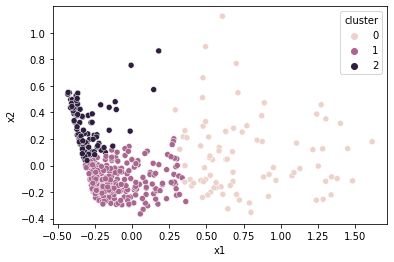

In [542]:
#create dataframe and the plot

clusters2=clusterskm.select_dtypes(include=['int64','float64'])
clusters2_scale=MinMaxScaler().fit_transform(clusters2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(clusters2_scale)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

labels=kmeans2.labels_
pca_df=pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

figkmean = sns.scatterplot(data=pca_df, x="x1", y="x2", hue='cluster')

- The Clusters are separated good on this clusters
- The 0 clusters is very dense, and the 1 and 2 clusters is less dense and theres less and less

## DB Scan Clustering

In [543]:
#dbscan fit and predict
dbscan.fit_predict(xreduceddb)
labels=dbscan.labels_
clustersdb=xreal2db.copy()
clustersdb['cluster']=labels

In [544]:
#view clusters and anomaly
clustersdb['cluster'].unique()

array([ 0, -1], dtype=int64)

In [545]:
#view silhouete score
silhouette_score(clustersdb,clustersdb['cluster'])

0.9479405072529422

- The silhuete score is very close to 1, this means that the data  have very little overlapping clusters

In [546]:
#define plot for dbscan
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

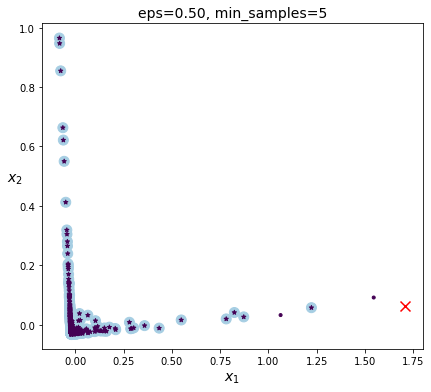

In [547]:
#view dbscan plot
plt.figure(figsize=(15, 6))

plt.subplot(121)
plot_dbscan(dbscan, xreduceddb, size=100)

plt.show()

- There is only 1 anomaly data seen
- Most of the games is on the lower left of the plot

## Agglomerative Clustering

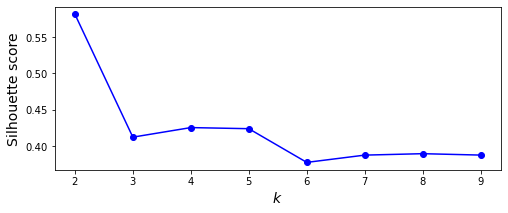

In [548]:
#fit to multiple k
agg_per_k = [AgglomerativeClustering(n_clusters=k).fit(xreduced) for k in range(1, 10)]

#silhouette score
silhouette_scores = [silhouette_score(xreduced, model.labels_)
                     for model in agg_per_k[1:]]

#silhouette scores plot
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- K 2 and 3 seems a good choice for K

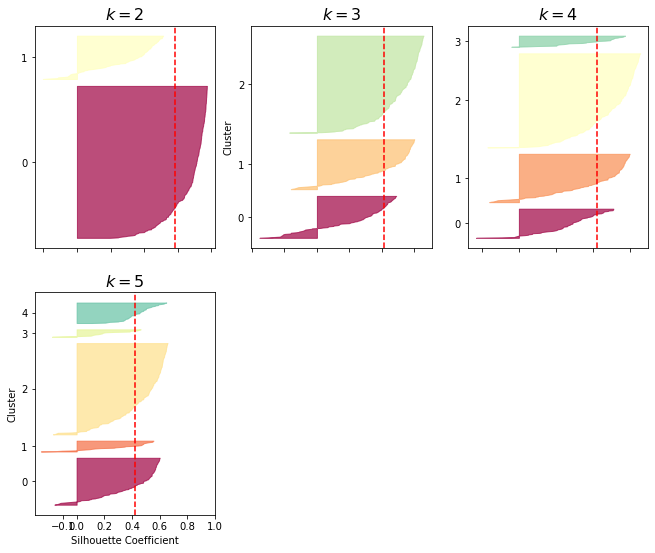

In [549]:
#view silhouette graph
plt.figure(figsize=(11, 9))

for k in (2,3,4,5):
    plt.subplot(2, 3, k - 1)
    
    y_pred = agg_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(xreduced, y_pred)

    padding = len(xreduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- I will choose 3 for the clusters

In [550]:
#fit and predict based on new clusters
agg2=AgglomerativeClustering(n_clusters=3)
agg2.fit_predict(xreduced)

#append labels to original dataframe
labels=agg2.labels_
clustersagg=xreal2.copy()
clustersagg['cluster']=labels

In [551]:
#append data for 
clustersagg2=xreal.copy()
clustersagg2['cluster']=labels

In [552]:
#view silhouette score
silhouette_score(clustersagg, clustersagg['cluster'])

0.037224372095807014

- The silhoete score is positive

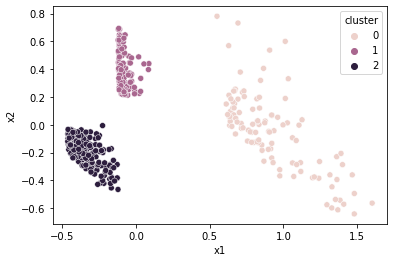

In [553]:
#create dataframe and the plot

clusters2=clustersagg.select_dtypes(include=['int64','float64'])
clusters2_scale=MinMaxScaler().fit_transform(clusters2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(clusters2_scale)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

labels=agg2.labels_
pca_df=pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

fig = sns.scatterplot(data=pca_df, x="x1", y="x2", hue='cluster')

- The Clusters are separated good on this clusters
- The 0 clusters is very dense, and the 1 and 2 clusters is less dense and theres less and less
- There is a gap between clusters

## Data Cluster Analysis

- K Means Clustering will be choosen for clustering because it have the best separation of clusters while having a positive silhouette score, and the clusters is not that far from the others.

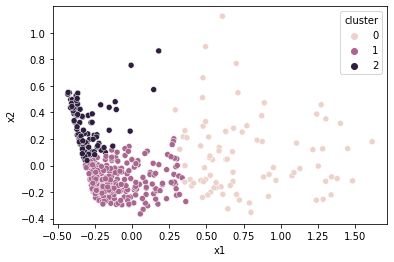

In [554]:
#create dataframe and the plot

clusters2=clusterskm.select_dtypes(include=['int64','float64'])
clusters2_scale=MinMaxScaler().fit_transform(clusters2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(clusters2_scale)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

labels=kmeans2.labels_
pca_df=pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

figkmean = sns.scatterplot(data=pca_df, x="x1", y="x2", hue='cluster')

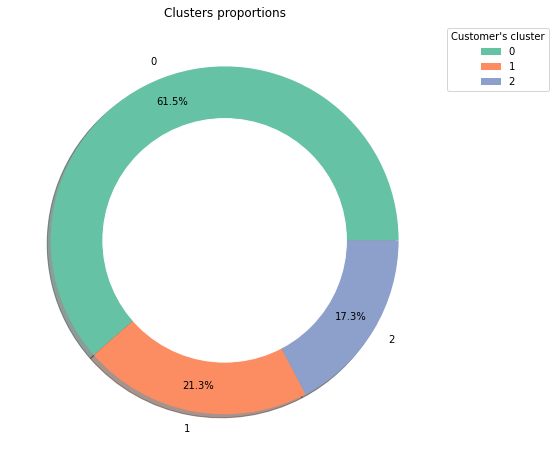

In [555]:
#view clusters percentages
sizes = dict(clusterskmr['cluster'].value_counts())
PALETTE = sns.color_palette("Set2")

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

- Most of the data came from cluster 0
- The 2nd biggest cluster is cluster 1, and then cluster 2 is the lowest 

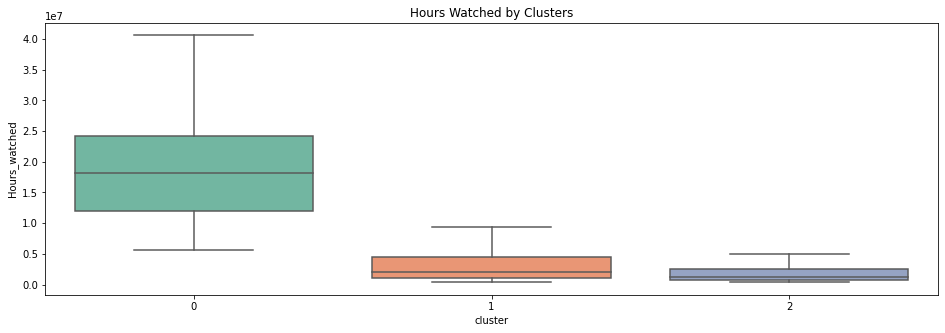

In [581]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Hours Watched by Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Hours_watched', palette=PALETTE, showfliers=False)
plt.show()

- Cluster 0 have the highest range of hours watched around 0.5e7 to more  than 3e7 hours
- Clusters 2 have the 2nd highest range of hours watched around 0.3.4e5 to almost 1e7 hours
- Clusters 1 have the last place of hours watched around  0.3.4e5 to almost half than 1e7 hours

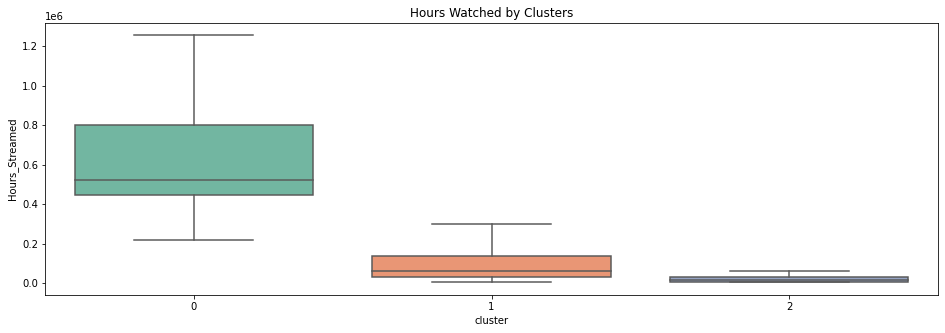

In [557]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Hours Watched by Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Hours_Streamed', palette=PALETTE, showfliers=False)
plt.show()

- Cluster 0 have the largest Hours streamed range. ranging from about 0.2e+6 to above 1.2e+6
- Cluster 1 have the smallest Hours streamed range, so small that its difficult to approximate the range from this image.
- Cluster 2 have a range thats similar to cluster 1 even though it is a little bigger.

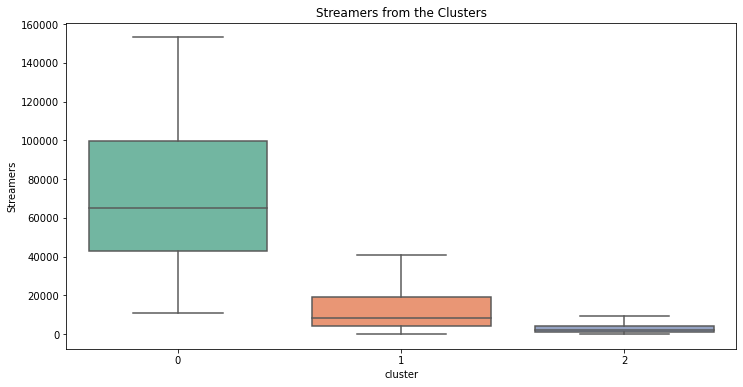

In [558]:
#view clusters based on overall life expectancy
plt.figure(figsize=(12,6))
plt.title(f'Streamers from the Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Streamers', palette=PALETTE, showfliers=False)
plt.show()

- Cluster 0 have the highest range of streamers around 10k to above 140k streamers
- Clusters 2 have the 2nd highest range of streamers around 1k to 40k streamers
- Clusters 1 have the last place of streamers around 1k to 10k streamers

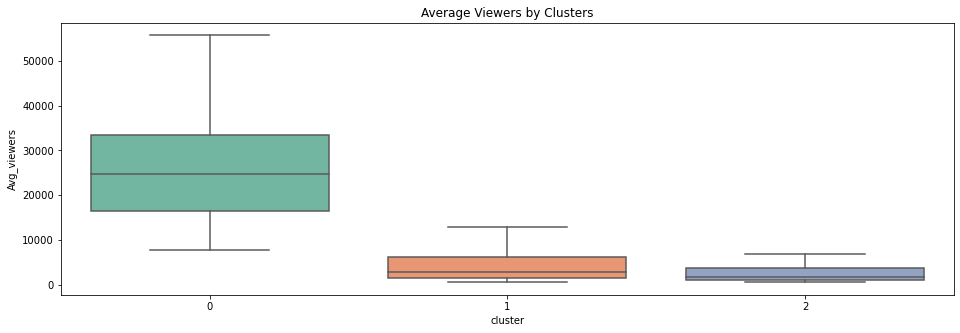

In [559]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Average Viewers by Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Avg_viewers', palette=PALETTE, showfliers=False)
plt.show()

- Clusters 0 have the highest range of avg viewers around 7k to above 40k avg viewers
- Clusters 2 have the 2nd highest range of avg viewers around 2k to 7k avg viewers
- Clusters 1 have the last place of avg viewers around 1k to 5k avg viewers

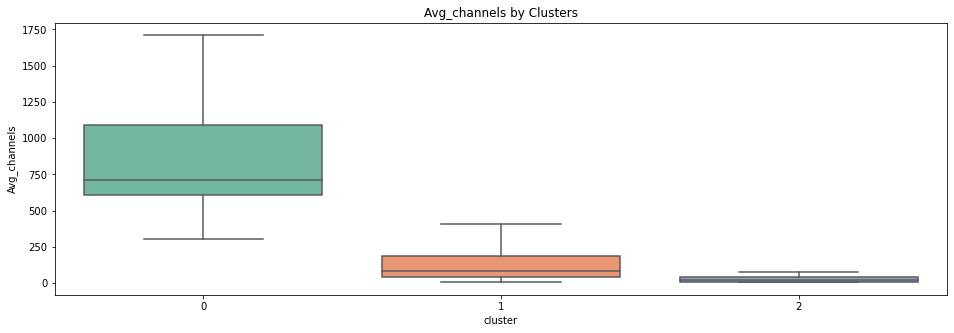

In [560]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Avg_channels by Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Avg_channels', palette=PALETTE, showfliers=False)
plt.show()

- Clusters 0 have the highest range of avg channels around 287 to 1709 avg channels
- Clusters 2 have the 2nd highest range of avg channels around from almost 8 to around half than 500 avg channels
- Clusters 1 have the last place of avg channels around from almost 4 to 220  avg viewers

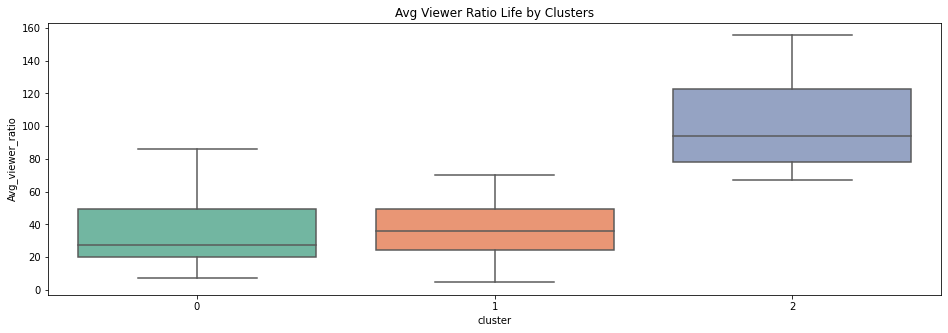

In [587]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Avg Viewer Ratio Life by Clusters')
ax = sns.boxplot(data=clusterskmr, x='cluster', y='Avg_viewer_ratio', palette=PALETTE, showfliers=False)
plt.show()

- Clusters 0 have the range of viewer ratio around 7 to above 80 viewer ratio
- Clusters 2 have the range of viewer ratio around from around 4 to around 70 viewer ratio
- Clusters 1 have the highest range of avg channels around from around 70 8 to around 160  avg viewers

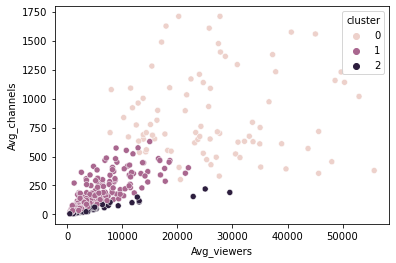

In [562]:
#cluster 2 avg_viewers with acg_channels
fig = sns.scatterplot(data=clusterskmr, x="Avg_viewers", y="Avg_channels", hue='cluster')

- In terms of average channels and average viewers, both cluster 1 and 2 have a relatively low number
- Cluster 0 have a relatively high avg viewers and channels, yet they are so disperse

<AxesSubplot:xlabel='Streamers', ylabel='Hours_watched'>

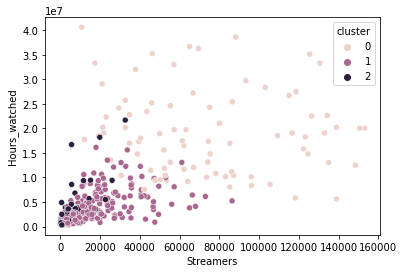

In [563]:
#cluster 2 avg_viewers with acg_channels
sns.scatterplot(data=clusterskmr, y="Hours_watched", x="Streamers", hue='cluster')

- Most of the games that streams on cluster 2 have are about 1 - 60000 streamers,while cluster 1 is around 1 to 20000, and bot of theese clusters hours watched is relatively low compared to cluster 0
- Cluster 0 yet again have a very disperse distribution of hours watcehd and streamers. But Mostly they are accumulated around 20k - 85k streamers and 1e+7 and 2.5e+7

<AxesSubplot:xlabel='Streamers', ylabel='Hours_Streamed'>

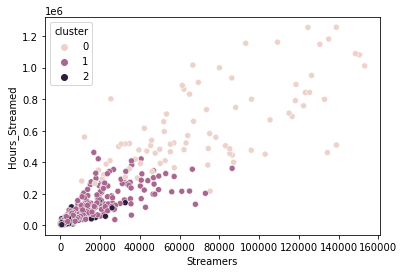

In [564]:
#cluster 2 avg_viewers with acg_channels
sns.scatterplot(data=clusterskmr, y="Hours_Streamed", x="Streamers", hue='cluster')

- Both the games on cluster 1 and 2 on this clusters is very cornered on streamers about 1 - 25k and hours streamed about 0 - 0.3e+6
- Cluster 0 however, have a disperse but liniear distribution that mostly above cluster 1 and 2

<AxesSubplot:xlabel='Hours_watched', ylabel='Hours_Streamed'>

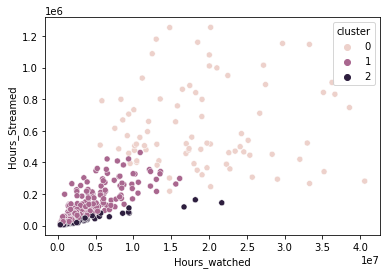

In [565]:
#cluster 2 avg_viewers with acg_channels
sns.scatterplot(data=clusterskmr, y="Hours_Streamed", x="Hours_watched", hue='cluster')

- Both the games on cluster 1 and 2 on this clusters is very cornered on hours watched about 0 - 1.25e+7 and hours streamed about 0 - 0.3e+6
- Cluster 0 however, have a disperse but liniear distribution that mostly above cluster 1 and 2

<AxesSubplot:xlabel='Avg_viewers', ylabel='Avg_viewer_ratio'>

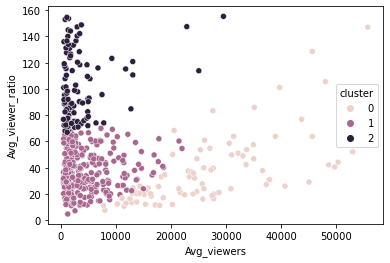

In [583]:
#cluster 2 avg_viewers with acg_channels
sns.scatterplot(data=clusterskmr, x="Avg_viewers", y="Avg_viewer_ratio", hue='cluster')

- Cluster 1 have a relatively high viewer ratio, this means that theese games have little channels who stream this games, yet their view is high
- Cluster 2 have a low viewer and low ratio compared to cluster 1.
- Cluster 3 have a disperse viewer ratio and avg viewers

In [567]:
#group by cluster
cluster2=clusterskmr[clusterskmr['cluster']==2].sort_values(by='Avg_viewer_ratio',ascending=False).reset_index(drop=True)
cluster1=clusterskmr[clusterskmr['cluster']==1].sort_values(by='Avg_viewer_ratio',ascending=False).reset_index(drop=True)
cluster0=clusterskmr[clusterskmr['cluster']==0].sort_values(by='Avg_viewer_ratio',ascending=False).reset_index(drop=True)

In [568]:
#view top 5 data
cluster2.head(5)

,Game,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,cluster
0,Jump King,21693118,144094,32689,29522,190,155.378947,2
1,Yakuza 6: The Song of Life,778561,5309,390,1082,7,154.571429,2
2,Blazing Sails,995524,6478,1286,1384,9,153.777778,2
3,Remothered: Broken Porcelain,568626,4051,891,765,5,153.000000,2
4,Super Auto Pets,2675950,18311,3734,3721,25,148.840000,2


- Theese are the top 5 games on cluster 2 that have the highest Avg viewer ratio, means that every channel have about that number of players.
- Blue Archive is a relatively new Mobile Game, yet ot has a decent avg viewer ratio

In [569]:
#view top 5 data
cluster1.head(5)

,Game,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,cluster
0,Gas Station Simulator,5265679,76429,13260,7275,104,69.951923,1
1,Mario Kart 8 Deluxe,6832418,100604,26954,9341,135,69.192593,1
2,Monopoly Plus,3540021,54969,15560,4996,75,66.613333,1
3,HUMANKIND,2712686,41137,5348,3650,55,66.363636,1
4,Grand Theft Auto: Vice City  The Definitive E...,1464032,22782,4121,2036,31,65.677419,1


- Theese are the top 5 games on cluster 1 that have the highest Avg viewer ratio.
- Jump King is a popular, yet simple game. The gameplay is what makes the streamers react and attract the viewers.

In [570]:
#view top 5 data
cluster0.head(10)

,Game,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,cluster
0,Heroes of Might and Magic III: The Restoration...,40595598,281329,10819,55744,379,147.081794,0
1,Virtual Casino,33304796,266286,17438,45653,355,128.600000,0
2,TrackMania,35223677,341349,46230,48043,455,105.589011,0
3,StarCraft,29054773,293680,21075,39725,393,101.081425,0
4,Tabletop RPGs,25726246,306380,32720,35133,409,85.899756,0
5,Project Zomboid,20223704,245878,21407,27606,331,83.401813,0
6,"Pools, Hot Tubs, and Beaches",32020396,419682,37792,43730,569,76.854130,0
7,Crab Game,14800812,217394,75368,20550,301,68.272425,0
8,Mount & Blade II: Bannerlord,22770969,358692,34766,31367,491,63.883910,0
9,GeoGuessr,28357413,451385,103070,38932,610,63.822951,0


- Theese are the top 5 games on cluster 0 that have the highest Avg viewer ratio.
- Pools, Hot Tubs and Beaches is not a game, its a category that is semi R+18 (girls bathing using bikini etc), this category have a decent avg_viewer ratio

## Cluster Characteristics

### Cluster 0

- High Hours Streamed
- Highest number of streamers
- High Average viewers
- High Average channels
- Low Average viewer ratio

### Cluster 1

- Lowest Hours Streamed
- Lowest number of streamers
- Lowest Average viewers
- Lowest Average channels
- Highest Average viewer ratio

### Cluster 2

- Moderate Hours Streamed, but close to Cluster 1
- Moderate number of Streamers, but close to cluster 1
- Moderate number of average viewers 
- Moderate number of avg channels
- Moderate Average viewer ratio but still close to cluster 0

# 10. Model Saving

In [571]:
#importmodel
filename = open('kmeans2.pkl','wb')
pickle.dump(kmeans2,filename)
filename.close()

In [572]:
#importmodel
filename = open('pcakagg.pkl','wb')
pickle.dump(pcakagg,filename)
filename.close()

In [573]:
#importmodel
filename = open('minmax.pkl','wb')
pickle.dump(minmax,filename)
filename.close()

# 11. Model Inference

## Process Validity Data

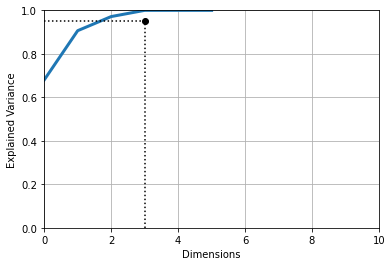

In [574]:
#dropping game because it is a categorical data
xvalid2=xvalid.drop(columns=['Game'])

#fit pipeline to train and test data features
xvalids=minmax.fit_transform(xvalid2)

#define pca and fit
pca = PCA()
pca.fit(xvalids)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

#plot pca graph
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [575]:
#fit transform pca
pca = PCA(n_components=3)
xreducedvalid = pca.fit_transform(xvalids)

#check explained ratio
np.sum(pca.explained_variance_ratio_)

0.9714494467989181

## Fit to K Means

In [576]:
#fit and predict based on new clusters
kmeans3=KMeans(n_clusters=3, random_state=91)
kmeans3.fit_predict(xreducedvalid)

#append labels to original dataframe with CATEGORICAL data
labels=kmeans3.labels_
clustersvalid=xvalid2.copy()
clustersvalid['cluster']=labels

In [577]:
#view data
clustersvalid.sample(5)

,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,cluster
34,1059584,44333,4083,1426,59,24.169492,0
42,5952175,127224,13857,8011,171,46.847953,0
37,541188,30326,1718,728,40,18.200000,0
16,6049066,315565,58920,8230,423,19.456265,1
2,544924,23367,4762,733,31,23.645161,0


# 12. Summary

- Usually,Twitch ads can be in 2 forms, a short video about 15 secs at the beginning/middle of the stream, or:
- A Streamer showing a logo/brand on its stream.

Based On the clusters, we can suggest that:

- If you wanted to put on the 1st 2nd type of ads, you should take a look of streamers who streams the game on cluster 0, becuase they have high hours streamed, and a high average viewer.
- You also have a lot of alternative on this cluster, because they have a lot of streamers streaming theese games.
- If you wanted another option, you can take a look at 2nd clusters, because they have a middle numbers between the 0 and 1 cluster.
- Clusters 1 have lowest numbers of all, but have the highest Average viewer ratio, meaning that only a few channel play theese games, but the viewer is decent, if you wanted only the 1st type of ads, you can consider this cluster.